In this project a CNN has been built in Keras and trained on CIFAR-10 dataset.

[CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html)

Here is the baseline:
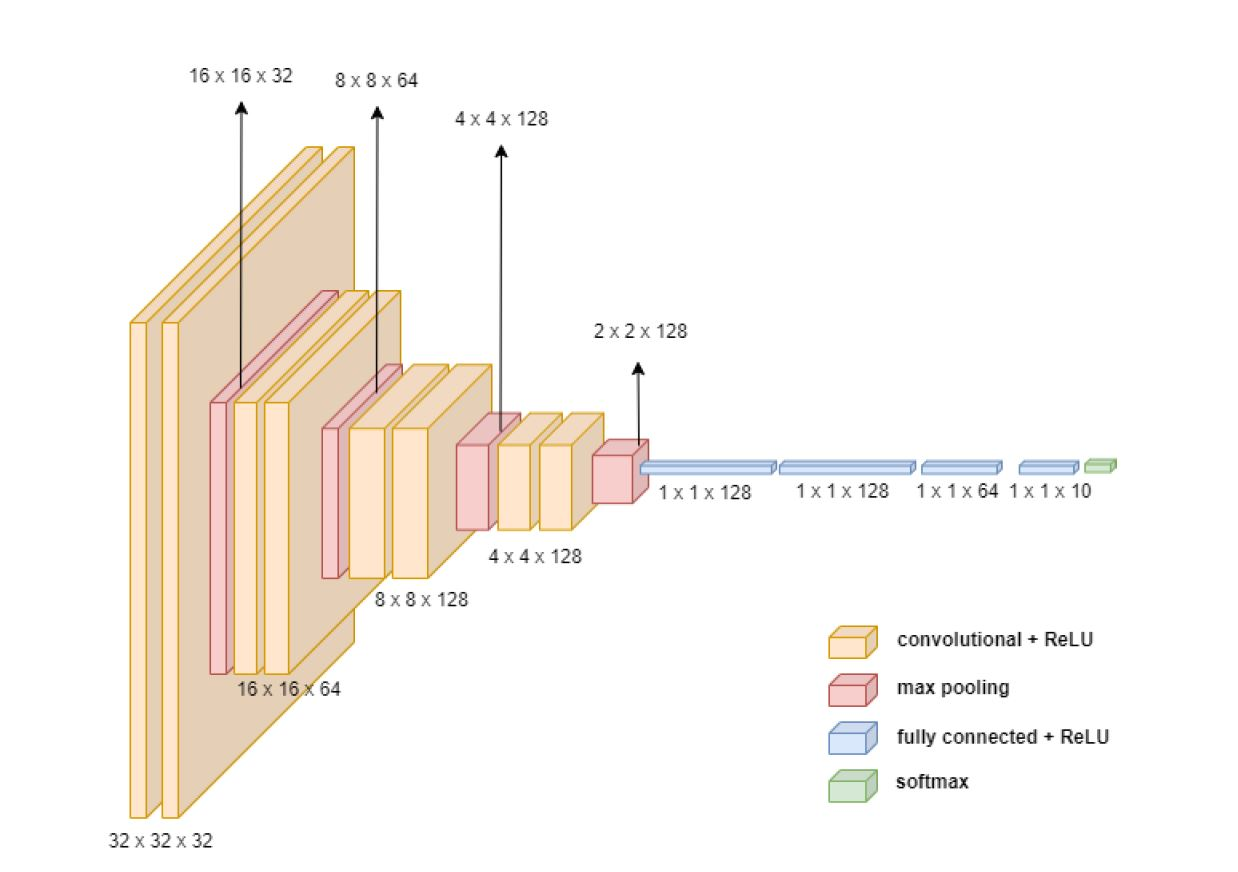

During this project different properties such as batch normalization and dropping out the data have been studied, also their results and effects have been compared.

In [ ]:
from tensorflow import keras
from tensorflow.keras import datasets, layers, losses
import numpy as np
import matplotlib.pyplot as plt

# ***First Part***

# **Load Data**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
print(type(train_images))
print(train_images.shape)

<class 'numpy.ndarray'>
(50000, 32, 32, 3)


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Text(0.5, 1.0, 'automobile')

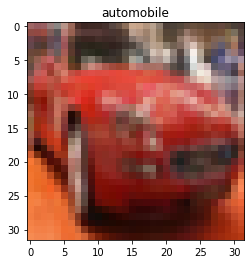

In [ ]:
index = 5
plt.imshow(train_images[index])
plt.title(class_names[train_labels[index][0]])

# **1. Base Model**

In [ ]:
model = keras.Sequential([

    # convolutional layer                        
    layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    # max pooling
    layers.MaxPool2D((2, 2)),

    # convolutional layer with relu activation function
    layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    # max pooling
    layers.MaxPool2D((2, 2)),

    # convolutional layer with relu activation function
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    # max pooling
    layers.MaxPool2D((2, 2)),
    
    # convolutional layer with relu activation function
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    # max pooling
    layers.MaxPool2D((2, 2)),

    # flat data
    layers.Flatten(),
    #fully connected layers with relu activation function
    layers.Dense(128, kernel_initializer='he_uniform', activation='relu'),
    layers.Dense(128, kernel_initializer='he_uniform', activation='relu'),
    layers.Dense(64, kernel_initializer='he_uniform', activation='relu'),
    # last fully connected layer with softmax activation function
    layers.Dense(10, kernel_initializer='he_uniform', activation='softmax')

])

In [ ]:
# check the architecture of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [ ]:
# compile model
model.compile(loss=losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
# train
history = model.fit(train_images, train_labels, batch_size=32, epochs=40, validation_data=(test_images, test_labels))

Epoch 1/40
1563/1563 [==============================] - 49s 30ms/step - loss: 0.8807 - accuracy: 0.6984 - val_loss: 1.0768 - val_accuracy: 0.6514
Epoch 2/40
1563/1563 [==============================] - 40s 26ms/step - loss: 0.7760 - accuracy: 0.7382 - val_loss: 1.0853 - val_accuracy: 0.6637
Epoch 3/40
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7532 - accuracy: 0.7515 - val_loss: 1.0819 - val_accuracy: 0.7042
Epoch 4/40
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8206 - accuracy: 0.7543 - val_loss: 1.0173 - val_accuracy: 0.6928
Epoch 5/40
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7889 - accuracy: 0.7567 - val_loss: 1.1446 - val_accuracy: 0.6914
Epoch 6/40
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8586 - accuracy: 0.7550 - val_loss: 0.9364 - val_accuracy: 0.6932
Epoch 7/40
1563/1563 [==============================] - 38s 25ms/step - loss: 2.3237 - accuracy: 0.7520 - val_loss: 1.3138 -

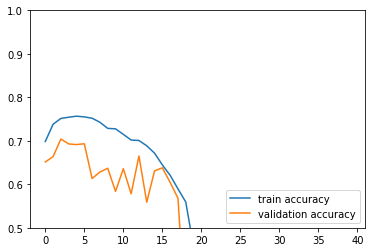

In [ ]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 1.8669 - accuracy: 0.3748


  - As you can see after 19th epoch the accuracy, specially the validation accuracy, began to decrease which means our model failed to fit to additional data or predict future observations reliably, so overfitting occurred.

# **2. BatchNormalization Layer**

Layer that normalizes its inputs.

Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.

Importantly, batch normalization works differently during training and during inference.

[Keras BatchNormalization Layer](https://keras.io/api/layers/normalization_layers/batch_normalization/#:~:text=BatchNormalization%20class&text=Layer%20that%20normalizes%20its%20inputs,during%20training%20and%20during%20inference.)

We can add batch normalization into our model by adding it between the output of a layer and it's activation.

Here We add BatchNorm into our model by adding it in the same way as adding Dense layer:

In [ ]:
model = keras.Sequential([ 
                            
    layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.MaxPool2D((2, 2)),

    layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.MaxPool2D((2, 2)),

    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.MaxPool2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.MaxPool2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, kernel_initializer='he_uniform', activation='relu'),
    # batchnormalization
    layers.BatchNormalization(),
    layers.Dense(128, kernel_initializer='he_uniform', activation='relu'),
    # batchnormalization
    layers.BatchNormalization(),
    layers.Dense(64, kernel_initializer='he_uniform', activation='relu'),

    layers.Dense(10, kernel_initializer='he_uniform', activation='softmax')

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [ ]:
model.compile(loss=losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=40, validation_data=(test_images, test_labels))

Epoch 1/40
1563/1563 [==============================] - 45s 27ms/step - loss: 1.6079 - accuracy: 0.4059 - val_loss: 2.7232 - val_accuracy: 0.3159
Epoch 2/40
1563/1563 [==============================] - 39s 25ms/step - loss: 1.1345 - accuracy: 0.5947 - val_loss: 1.9338 - val_accuracy: 0.4844
Epoch 3/40
1563/1563 [==============================] - 38s 25ms/step - loss: 0.9170 - accuracy: 0.6765 - val_loss: 1.0802 - val_accuracy: 0.6925
Epoch 4/40
1563/1563 [==============================] - 38s 25ms/step - loss: 0.7892 - accuracy: 0.7258 - val_loss: 2.3641 - val_accuracy: 0.4046
Epoch 5/40
1563/1563 [==============================] - 38s 24ms/step - loss: 0.6994 - accuracy: 0.7586 - val_loss: 5.0187 - val_accuracy: 0.7388
Epoch 6/40
1563/1563 [==============================] - 38s 25ms/step - loss: 0.6320 - accuracy: 0.7816 - val_loss: 0.9310 - val_accuracy: 0.7052
Epoch 7/40
1563/1563 [==============================] - 38s 24ms/step - loss: 0.5728 - accuracy: 0.8044 - val_loss: 0.9594 -

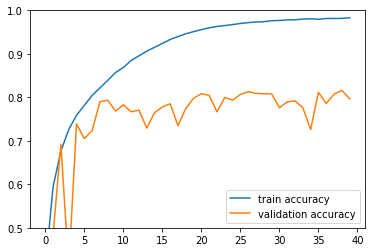

In [ ]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 10ms/step - loss: 438.6610 - accuracy: 0.7962


  - Although after adding batch normalization the result of prediction became better, it is still overfitting since after 5th epoch the accuracy stops.

# **3. Dropout Layer**

The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.

[Keras Dropout Layer](https://keras.io/api/layers/regularization_layers/dropout/#:~:text=The%20Dropout%20layer%20randomly%20sets,over%20all%20inputs%20is%20unchanged.)

In [ ]:
model = keras.Sequential([ 
                            
    layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.MaxPool2D((2, 2)),
    # drop out layer
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.MaxPool2D((2, 2)),
    # drop out layer
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.MaxPool2D((2, 2)),
    # drop out layer
    layers.Dropout(0.25),

    
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.MaxPool2D((2, 2)),
    # drop out layer
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, kernel_initializer='he_uniform', activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, kernel_initializer='he_uniform', activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(64, kernel_initializer='he_uniform', activation='relu'),
    # drop out layer
    layers.Dropout(0.25),
    layers.Dense(10, kernel_initializer='he_uniform', activation='softmax')

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [ ]:
model.compile(loss=losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=40, validation_data=(test_images, test_labels))

Epoch 1/40
1563/1563 [==============================] - 47s 28ms/step - loss: 1.9677 - accuracy: 0.2517 - val_loss: 1.7285 - val_accuracy: 0.3431
Epoch 2/40
1563/1563 [==============================] - 42s 27ms/step - loss: 1.5346 - accuracy: 0.4244 - val_loss: 1.6320 - val_accuracy: 0.4436
Epoch 3/40
1563/1563 [==============================] - 43s 27ms/step - loss: 1.3134 - accuracy: 0.5279 - val_loss: 1.4740 - val_accuracy: 0.4857
Epoch 4/40
1563/1563 [==============================] - 43s 28ms/step - loss: 1.1698 - accuracy: 0.5884 - val_loss: 1.3946 - val_accuracy: 0.5285
Epoch 5/40
1563/1563 [==============================] - 44s 28ms/step - loss: 1.0641 - accuracy: 0.6257 - val_loss: 0.9620 - val_accuracy: 0.6545
Epoch 6/40
1563/1563 [==============================] - 46s 30ms/step - loss: 0.9888 - accuracy: 0.6563 - val_loss: 0.9859 - val_accuracy: 0.6600
Epoch 7/40
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9340 - accuracy: 0.6787 - val_loss: 0.9407 -

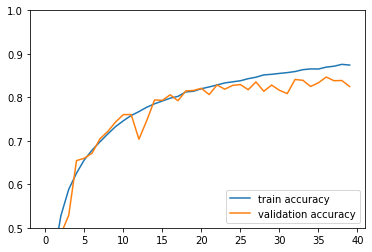

In [ ]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 10ms/step - loss: 0.5895 - accuracy: 0.8248


   - As the result shows after adding drop out layer overfitting problem has been solved and reached accuracy is acceptabble.  

# **4. Optimizer**

In deep learning, we have the concept of loss, which tells us how poorly the model is performing at that current instant. Now we need to use this loss to train our network such that it performs better. Essentially what we need to do is to take the loss and try to minimize it, because a lower loss means our model is going to perform better. The process of minimizing (or maximizing) any mathematical expression is called optimization.

Optimizers are algorithms or methods used to change the attributes of the neural network such as weights and learning rate to reduce the losses. Optimizers are used to solve optimization problems by minimizing the function.

You can either instantiate an optimizer before passing it to model.compile() or you can pass it by its string identifier. In the latter case, the default parameters for the optimizer will be used.

Available optimizers

   - SGD

   - RMSprop

   - Adam

   - Adadelta

   - Adagrad

   - Adamax

   - Nadam

   - Ftrl

[Keras Optimizer](https://keras.io/api/optimizers/)

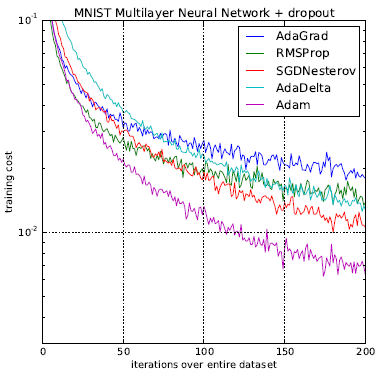

[Optimization Algorithms in Neural Networks](https://www.kdnuggets.com/2020/12/optimization-algorithms-neural-networks.html)

We trained the last model which has dropout layer, batch normalization and the most percentage of accuracy using three optimizers.

# Stochastic Gradient Descent (SGD)
SGD algorithm is an extension of the Gradient Descent and it overcomes some of the disadvantages of the GD algorithm. Gradient Descent has a disadvantage that it requires a lot of memory to load the entire dataset of n-points at a time to compute the derivative of the loss function. **In the SGD algorithm derivative is computed taking one point at a time.**

To make the training even faster we take a Gradient Descent step for each training example. Let's see what the implications would be in the image below.



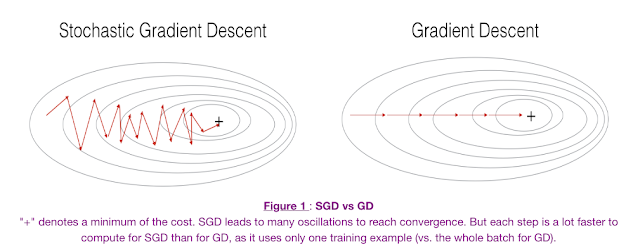

Memory requirement is less compared to the GD algorithm as the derivative is computed taking only 1 point at once.

In [ ]:
model.compile(optimizer='SGD', loss=losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=40, validation_data=(test_images, test_labels))

Epoch 1/40
1563/1563 [==============================] - 37s 23ms/step - loss: 2.1803 - accuracy: 0.1977 - val_loss: 1.9718 - val_accuracy: 0.2483
Epoch 2/40
1563/1563 [==============================] - 34s 22ms/step - loss: 1.7930 - accuracy: 0.3090 - val_loss: 1.8119 - val_accuracy: 0.3166
Epoch 3/40
1563/1563 [==============================] - 34s 22ms/step - loss: 1.6231 - accuracy: 0.3934 - val_loss: 1.8993 - val_accuracy: 0.3049
Epoch 4/40
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4888 - accuracy: 0.4543 - val_loss: 1.5900 - val_accuracy: 0.4372
Epoch 5/40
1563/1563 [==============================] - 33s 21ms/step - loss: 1.3790 - accuracy: 0.4988 - val_loss: 1.2459 - val_accuracy: 0.5332
Epoch 6/40
1563/1563 [==============================] - 33s 21ms/step - loss: 1.2930 - accuracy: 0.5320 - val_loss: 1.3910 - val_accuracy: 0.5168
Epoch 7/40
1563/1563 [==============================] - 34s 21ms/step - loss: 1.2174 - accuracy: 0.5633 - val_loss: 1.3837 -

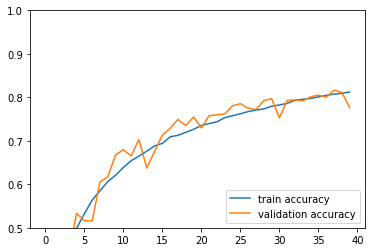

In [ ]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 10ms/step - loss: 0.6924 - accuracy: 0.7762


# RMSprop
RMSprop in fact is identical to the first update vector of Adadelta that we derived above:

$${E[g^2]_t=0.9E[g^2]_{t-1}+0.1g^2_t}$$


$${\theta_{t+1}=\theta_t-\frac{η}{\sqrt{E[g^2]_t+\epsilon}}g_t}$$

RMSprop as well divides the learning rate by an exponentially decaying average of squared gradients. Hinton suggests γ be set to 0.9, while a good default value for the learning rate η is 0.001.

RMSprop and Adadelta have both been developed independently around the same time stemming from the need to resolve Adagrad's radically diminishing learning rates

In [ ]:
model.compile(optimizer='RMSprop', loss=losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=40, validation_data=(test_images, test_labels))

Epoch 1/40
1563/1563 [==============================] - 48s 29ms/step - loss: 1.9787 - accuracy: 0.2514 - val_loss: 1.9976 - val_accuracy: 0.2916
Epoch 2/40
1563/1563 [==============================] - 40s 25ms/step - loss: 1.5498 - accuracy: 0.4164 - val_loss: 1.5425 - val_accuracy: 0.4511
Epoch 3/40
1563/1563 [==============================] - 43s 28ms/step - loss: 1.3133 - accuracy: 0.5243 - val_loss: 1.6318 - val_accuracy: 0.4780
Epoch 4/40
1563/1563 [==============================] - 45s 29ms/step - loss: 1.1548 - accuracy: 0.5910 - val_loss: 1.3585 - val_accuracy: 0.5570
Epoch 5/40
1563/1563 [==============================] - 46s 29ms/step - loss: 1.0557 - accuracy: 0.6294 - val_loss: 0.9657 - val_accuracy: 0.6509
Epoch 6/40
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9800 - accuracy: 0.6598 - val_loss: 0.8931 - val_accuracy: 0.6861
Epoch 7/40
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9208 - accuracy: 0.6843 - val_loss: 0.7857 -

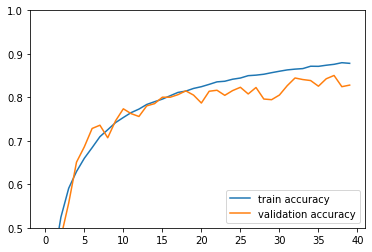

In [ ]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 10ms/step - loss: 0.6093 - accuracy: 0.8281


# Adaptive Moment Estimation (Adam)
Adam can be looked at as a combination of RMSprop and Stochastic Gradient Descent with momentum.

Adam computes adaptive learning rates for each parameter. In addition to storing an exponentially decaying average of past squared gradients vt like Adadelta and RMSprop, Adam also keeps an exponentially decaying average of past gradients mt, similar to momentum. Whereas momentum can be seen as a ball running down a slope, Adam behaves like a heavy ball with friction, which thus prefers flat minima in the error surface.

Hyper-parameters **β1, β2 ∈ [0, 1)** control the exponential decay rates of these moving averages. We compute the decaying averages of past and past squared gradients mt and vt respectively as follows:

$${m_t=\beta_1m_{t-1}+(1-\beta_1)g_t}$$
$${v_t=\beta_2v_{t-1}+(1-\beta_2)g^2_t}$$

mt and vt are estimates of the first moment (the mean) and the second moment (the uncentered variance) of the gradients respectively, hence the name of the method.

In [ ]:
model.compile(optimizer='Adam', loss=losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=40, validation_data=(test_images, test_labels))

Epoch 1/40
1563/1563 [==============================] - 37s 22ms/step - loss: 1.9823 - accuracy: 0.2482 - val_loss: 1.5923 - val_accuracy: 0.3913
Epoch 2/40
1563/1563 [==============================] - 34s 22ms/step - loss: 1.4842 - accuracy: 0.4446 - val_loss: 1.4882 - val_accuracy: 0.4748
Epoch 3/40
1563/1563 [==============================] - 34s 22ms/step - loss: 1.2177 - accuracy: 0.5654 - val_loss: 1.0379 - val_accuracy: 0.6258
Epoch 4/40
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0450 - accuracy: 0.6324 - val_loss: 1.0310 - val_accuracy: 0.6494
Epoch 5/40
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9423 - accuracy: 0.6715 - val_loss: 0.8486 - val_accuracy: 0.6995
Epoch 6/40
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8474 - accuracy: 0.7106 - val_loss: 0.8337 - val_accuracy: 0.7184
Epoch 7/40
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7797 - accuracy: 0.7374 - val_loss: 0.6937 -

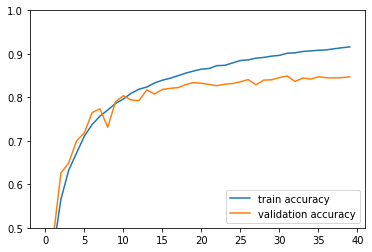

In [ ]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 10ms/step - loss: 0.5204 - accuracy: 0.8472


   - RMSprop is fatser than SGD an Adam. Adam has the highest validation accuracy and train accuracy between these three. Validation accuracy and train accuracy of RMSprop and SGD were really close.

# **5. Evaluation Criteria**

[Classification metrics based on True/False positives & negatives](https://keras.io/api/metrics/classification_metrics/#precision-class)

# Precision

Computes the precision of the predictions with respect to the labels.

The metric creates two local variables, true_positives and false_positives that are used to compute the precision. This value is ultimately returned as precision, an idempotent operation that simply divides true_positives by the sum of true_positives and false_positives.

If sample_weight is None, weights default to 1. Use sample_weight of 0 to mask values.

If top_k is set, we'll calculate precision as how often on average a class among the top-k classes with the highest predicted values of a batch entry is correct and can be found in the label for that entry.

If class_id is specified, we calculate precision by considering only the entries in the batch for which class_id is above the threshold and/or in the top-k highest predictions, and computing the fraction of them for which class_id is indeed a correct label.

    tf.keras.metrics.Precision(
    thresholds=None, top_k=None, class_id=None, name=None, dtype=None
    )

# recall
Computes the recall of the predictions with respect to the labels.

This metric creates two local variables, true_positives and false_negatives, that are used to compute the recall. This value is ultimately returned as recall, an idempotent operation that simply divides true_positives by the sum of true_positives and false_negatives.

If sample_weight is None, weights default to 1. Use sample_weight of 0 to mask values.

If top_k is set, recall will be computed as how often on average a class among the labels of a batch entry is in the top-k predictions.

If class_id is specified, we calculate recall by considering only the entries in the batch for which class_id is in the label, and computing the fraction of them for which class_id is above the threshold and/or in the top-k predictions.

    tf.keras.metrics.Recall(
    thresholds=None, top_k=None, class_id=None, name=None, dtype=None
    )

# F1Score
It is the harmonic mean of precision and recall. Output range is [0, 1]. Works for both multi-class and multi-label classification.

$${F_1=2.\frac{precision.recall}{precision+recall}}$$

[F1Score tensorflow](https://www.tensorflow.org/addons/api_docs/python/tfa/metrics/F1Score)

# ***Second Part***

# **1. Data Augmentation**

When you do not have enough data and need more, data augmentation really helps you. We do augmentation before we feed the data to the model, but you have two options here. One option is to perform all the necessary transformations beforehand, essentially increasing the size of your dataset. The other option is to perform these transformations on a mini-batch, just before feeding it to your machine learning model.

For instance, to get more data, we just need to make minor alterations to our existing dataset. Minor changes such as flips or translations or rotations. Our neural network would think these are distinct images anyway.

A convolutional neural network that can robustly classify objects even if its placed in different orientations is said to have the property called invariance. More specifically, a CNN can be invariant to translation, viewpoint, size or illumination (Or a combination of the above).

This essentially is the premise of data augmentation. In the real world scenario, we may have a dataset of images taken in a limited set of conditions. But, our target application may exist in a variety of conditions, such as different orientation, location, scale, brightness etc. We account for these situations by training our neural network with additional synthetically modified data.

**Popular Augmentation Techniques**


1.   Flip
2.   Rotation
3.   Scale
4.   Crop
5.   Translation
6.   Gaussian Noise

[Data Augmentation | How to use Deep Learning when you have Limited Data ](https://nanonets.com/blog/data-augmentation-how-to-use-deep-learning-when-you-have-limited-data-part-2/)


The purpose of data augmentation is to improve the model. Performing data augmentation on the validation and test sets kills the purpose of the splitting.
So, data augmentation can be applied to train data.

[Why  no augmentation applied to test or Validation data and only to Train data?](https://www.kaggle.com/questions-and-answers/291581)